In [26]:
%matplotlib inline
from utils import utils
import canny_edge_detector as ced

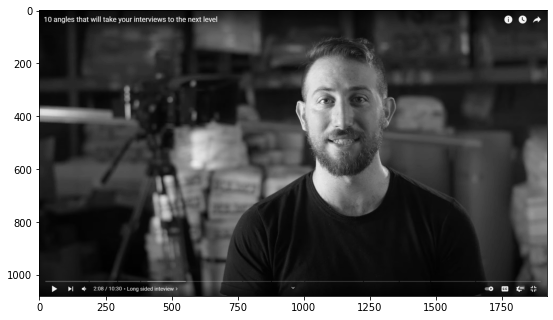

In [101]:
imgs = utils.load_data()
utils.visualize(imgs, 'gray')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
cd /content/drive/MyDrive/canny_edge_detector

/content/drive/MyDrive/canny_edge_detector


In [103]:
detector = ced.cannyEdgeDetector(imgs, sigma=1.4, kernel_size=5, lowthreshold=0.09, highthreshold=0.17, weak_pixel=100)

In [104]:
imgs_final = detector.detect()

In [105]:
from PIL import Image
import numpy as np
for i, img in enumerate(imgs_final):
    if img.shape[0] == 3:
      img = img.transpose(1,2,0)
    #Rescale to 0-255 and convert to uint8
    rescaled = (255.0 / img.max() * (img - img.min())).astype(np.uint8)
    im = Image.fromarray(rescaled)
    im.save('detected/3_1080.png')
    #img.save("converted.png", format="png")

In [69]:
from skimage import io
for i, img in enumerate(imgs_final):
   io.imsave('detected/output1.png', img.astype(np.uint16))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: detected/output1.png is a low contrast image
  This is separate from the ipykernel package so we can avoid doing imports until


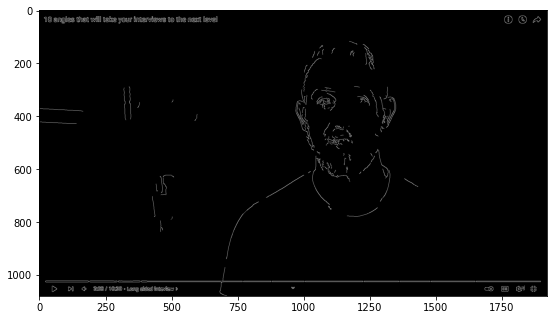

In [106]:
utils.visualize(imgs_final, 'gray')

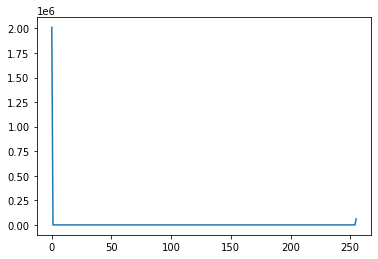

In [70]:

# importing required libraries of opencv
import cv2
  
# importing library for plotting
from matplotlib import pyplot as plt
  
# reads an input image
img = cv2.imread('detected/output1.png', 0)
  
# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()

In [107]:
import cv2
import numpy as np

img = cv2.imread('detected/3_1080.png', cv2.IMREAD_GRAYSCALE)
n_white_pix = np.sum(img == 255)
print('Number of white pixels:', n_white_pix)

Number of white pixels: 17069


In [128]:
filename = 'detected/1_144.png'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
imf = np.float32(img)/255.0



dctflt = cv2.dct(imf)  
#print(dctflt)

dctint = np.uint8(dctflt*255.0)
print(dctint)


#appying quantization (uniform quantization factor for all values)

dctfltcomp = np.around(dctflt, 1)
print(dctfltcomp)


cv2.imwrite(filename + "-dct.png", dctint)



imginv = cv2.idct(dctfltcomp)

imginvint = np.float32(imginv) * 255



cv2.imwrite(filename + "-invdct.png", imginvint)



[[123 165 246 ... 247 245  40]
 [174 144   6 ...  45  57   5]
 [ 87 105 242 ...  36  11 238]
 ...
 [248  53   2 ... 245   8   8]
 [245 214 231 ...  11 251 254]
 [242  16  22 ... 249   5 251]]
[[ 16.5  -2.4  -1.  ...  -0.   -0.    0.2]
 [-11.4   4.6   3.  ...   0.2   0.2   0. ]
 [  5.4   3.4   5.  ...   0.1   0.   -0.1]
 ...
 [ -0.    0.2   0.  ...  -0.    0.    0. ]
 [ -0.   -0.2  -0.1 ...   0.   -0.   -0. ]
 [ -0.1   0.1   0.1 ...  -0.    0.   -0. ]]


True